In [1]:
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

In [2]:
# FAI PIPELINE DI MACHINE LEARNING

Inizialmente, il dataset mi è stato fornito in <i>xlsx</i>, il formato standard per fogli di calcolo Excel.<br>
Lo converto in csv in quanto, per ogni nuova esecuzione del notebook, è notevolmente più veloce a caricare il dataframe.

In [3]:
# df = pd.read_excel("Africa_1997-2022_Jun17.xlsx") 
# df.to_csv("Africa_1997-2022_Jun17.csv")

In [4]:
df = pd.read_csv("Africa_1997-2022_Jun17.csv", index_col=0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267196 entries, 0 to 283355
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ISO               267196 non-null  int64  
 1   EVENT_ID_CNTY     267196 non-null  object 
 2   EVENT_ID_NO_CNTY  267196 non-null  int64  
 3   EVENT_DATE        267196 non-null  object 
 4   YEAR              267196 non-null  int64  
 5   TIME_PRECISION    267196 non-null  int64  
 6   EVENT_TYPE        267196 non-null  object 
 7   SUB_EVENT_TYPE    267196 non-null  object 
 8   ACTOR1            267195 non-null  object 
 9   ASSOC_ACTOR_1     67124 non-null   object 
 10  INTER1            267196 non-null  object 
 11  ACTOR2            195923 non-null  object 
 12  ASSOC_ACTOR_2     50011 non-null   object 
 13  INTER2            267196 non-null  int64  
 14  INTERACTION       267196 non-null  object 
 15  REGION            267196 non-null  object 
 16  COUNTRY           26

In [6]:
df.head()

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP,TRIMESTRE
0,12,ALG1,1,1997-01-01,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,Douaouda,36.672,2.789,1,Algeria Watch,Other,5 January: Beheading of 5 citizens in Douaouda...,5,1582579226,1997Q1
1,12,ALG2,2,1997-01-02,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,Hassasna,36.133,0.883,1,Algeria Watch,Other,Two citizens were beheaded in Hassasna.,2,1582579226,1997Q1
2,12,ALG3,3,1997-01-03,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,Hassi El Abed,34.966,-0.290,1,Algeria Watch,Other,Two citizens were killed in a raid on the vill...,2,1582579226,1997Q1
3,12,ALG4,4,1997-01-04,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,Blida,36.469,2.829,1,Algeria Watch,Other,4 January: 16 citizens were murdered in the vi...,16,1582579226,1997Q1
4,12,ALG5,5,1997-01-05,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,Douaouda,36.672,2.789,1,Algeria Watch,Other,5 January: Killing of 18 citizens in the Olivi...,18,1582579226,1997Q1


In [7]:
df[["REGION","COUNTRY","LOCATION","EVENT_DATE","YEAR","EVENT_TYPE","SUB_EVENT_TYPE","FATALITIES"]]

,REGION,COUNTRY,LOCATION,EVENT_DATE,YEAR,EVENT_TYPE,SUB_EVENT_TYPE,FATALITIES
0,Northern Africa,Algeria,Douaouda,1997-01-01,1997,Violence against civilians,Attack,5
1,Northern Africa,Algeria,Hassasna,1997-01-02,1997,Violence against civilians,Attack,2
2,Northern Africa,Algeria,Hassi El Abed,1997-01-03,1997,Violence against civilians,Attack,2
3,Northern Africa,Algeria,Blida,1997-01-04,1997,Violence against civilians,Attack,16
4,Northern Africa,Algeria,Douaouda,1997-01-05,1997,Violence against civilians,Attack,18
...,...,...,...,...,...,...,...,...
283351,Southern Africa,Zambia,Lusaka,2021-12-20,2021,Protests,Peaceful protest,0
283352,Southern Africa,Zambia,Ndola,2021-12-21,2021,Riots,Mob violence,0
283353,Southern Africa,Zambia,Isoka,2021-12-25,2021,Riots,Mob violence,1
283354,Southern Africa,Zambia,Senanga,2021-12-29,2021,Riots,Mob violence,0


Eliminiamo gli eventi avvenuti nel 2022

In [8]:
df = df[df['YEAR']<2022]

In [9]:
df['SUB_EVENT_TYPE'].unique().tolist()

['Attack',
 'Armed clash',
 'Remote explosive/landmine/IED',
 'Shelling/artillery/missile attack',
 'Peaceful protest',
 'Change to group/activity',
 'Looting/property destruction',
 'Government regains territory',
 'Disrupted weapons use',
 'Protest with intervention',
 'Violent demonstration',
 'Mob violence',
 'Air/drone strike',
 'Other',
 'Arrests',
 'Excessive force against protesters',
 'Abduction/forced disappearance',
 'Suicide bomb',
 'Grenade',
 'Non-violent transfer of territory',
 'Headquarters or base established',
 'Agreement',
 'Non-state actor overtakes territory',
 'Sexual violence',
 'Chemical weapon',
 'un record di prova']

In [10]:
len(df['SUB_EVENT_TYPE'].unique().tolist())

26

In [11]:
len(df['EVENT_TYPE'].unique().tolist())

6

In [12]:
df['EVENT_TYPE'].unique().tolist()

['Violence against civilians',
 'Battles',
 'Explosions/Remote violence',
 'Protests',
 'Strategic developments',
 'Riots']

In [13]:
df.groupby('EVENT_TYPE').size().rename('eventi').to_frame().reset_index().sort_values(by='eventi', ascending=False)

,EVENT_TYPE,eventi
0,Battles,70171
5,Violence against civilians,66123
2,Protests,62531
3,Riots,29380
1,Explosions/Remote violence,20730
4,Strategic developments,18261


In [14]:
df[df['EVENT_TYPE']=='Battles'].groupby(["REGION","COUNTRY"]).size().rename('eventi') \
                               .to_frame().reset_index() \
                               .sort_values(by='eventi', ascending=False).head()

,REGION,COUNTRY,eventi
11,Eastern Africa,Somalia,16727
19,Middle Africa,Democratic Republic of Congo,9152
47,Western Africa,Nigeria,5877
27,Northern Africa,Sudan,3995
12,Eastern Africa,South Sudan,3589


In [15]:
df.groupby(["EVENT_TYPE","SUB_EVENT_TYPE"]).size().rename('eventi').to_frame().reset_index().sort_values(by='eventi', ascending=False)

,EVENT_TYPE,SUB_EVENT_TYPE,eventi
0,Battles,Armed clash,64444
24,Violence against civilians,Attack,55801
11,Protests,Peaceful protest,53931
14,Riots,Violent demonstration,18756
13,Riots,Mob violence,10624
6,Explosions/Remote violence,Remote explosive/landmine/IED,8149
23,Violence against civilians,Abduction/forced disappearance,8017
12,Protests,Protest with intervention,6526
20,Strategic developments,Looting/property destruction,5822
3,Explosions/Remote violence,Air/drone strike,5541


In [16]:
df.groupby(["REGION","COUNTRY"]).size().rename('eventi').to_frame().reset_index().sort_values(by='eventi', ascending=False).head()

,REGION,COUNTRY,eventi
14,Eastern Africa,Somalia,35493
23,Middle Africa,Democratic Republic of Congo,23234
54,Western Africa,Nigeria,22728
32,Northern Africa,Sudan,15965
38,Southern Africa,South Africa,15881


In [17]:
df.groupby("REGION").size().rename('eventi').to_frame().reset_index().sort_values(by='eventi', ascending=False)

,REGION,eventi
0,Eastern Africa,84537
3,Northern Africa,63871
5,Western Africa,52574
2,Middle Africa,40966
4,Southern Africa,25247
1,Libya,1


In [18]:
df.groupby("REGION")[['FATALITIES']].sum().reset_index()

,REGION,FATALITIES
0,Eastern Africa,274947
1,Libya,1652899809
2,Middle Africa,249438
3,Northern Africa,143944
4,Southern Africa,3720
5,Western Africa,130272


## Raggruppiamo per anni

Inoltre rimpiazziamo i NaN con 0.<br> Settiamo tali celle a 0 dato che il loro valore è ottenuto dal seguente preprocessing in cui, ad ogni stato e per ogni anno, viene assegnato il conteggio degli eventi avvenuti in quel periodo e registrati nel dataset originale, quindi NaN indica l'inestistenza di osservazioni nel lasso di tempo.

In [19]:
def getEventCol(_df):
    return _df[['FATALITIES']].count().reset_index().rename(columns={'FATALITIES': 'EVENTS'}).fillna(0)

def regionPlots(_df,x="YEAR"):
    for label_region, region in _df.groupby(['REGION']):
        fig, ax = plt.subplots(figsize=(14,6))
        for label, country in region.groupby(['COUNTRY']):
            num = 10
            country.plot(x=x,y="EVENTS",ax=ax, label=label, title=label_region)
        plt.legend()
        
grouped = getEventCol(df.groupby(["REGION",'COUNTRY','YEAR']))
groupedProtests = getEventCol(df[df['EVENT_TYPE']=="Protests"].groupby(["REGION",'COUNTRY','YEAR']))
groupedBattles = getEventCol(df[df['EVENT_TYPE']=="Battles"].groupby(["REGION",'COUNTRY','YEAR']))
groupedViolence = getEventCol(df[df['EVENT_TYPE']=="Violence against civilians"].groupby(["REGION",'COUNTRY','YEAR']))
groupedPeaceful= getEventCol(df[df['SUB_EVENT_TYPE']=="Peaceful protest"].groupby(["REGION",'COUNTRY','YEAR']))

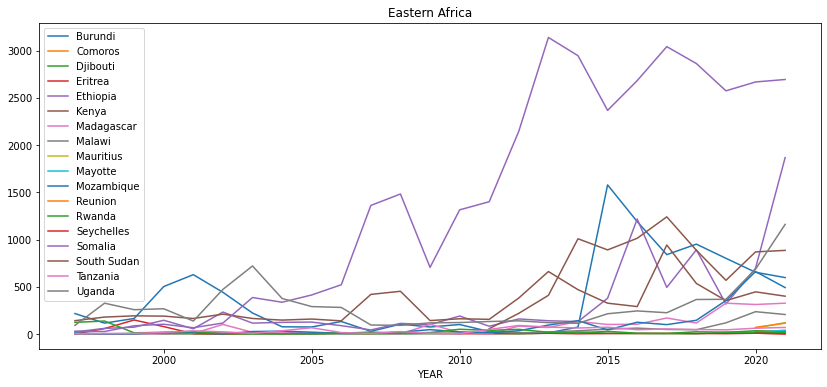

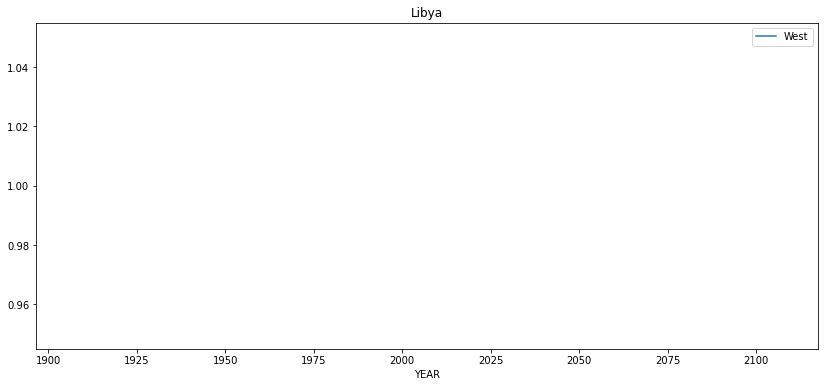

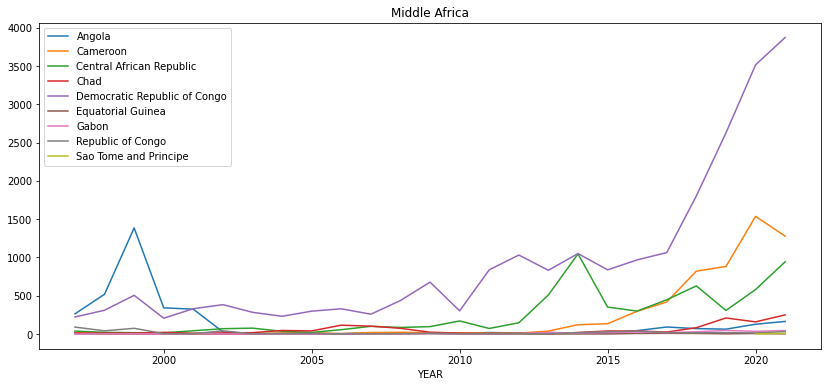

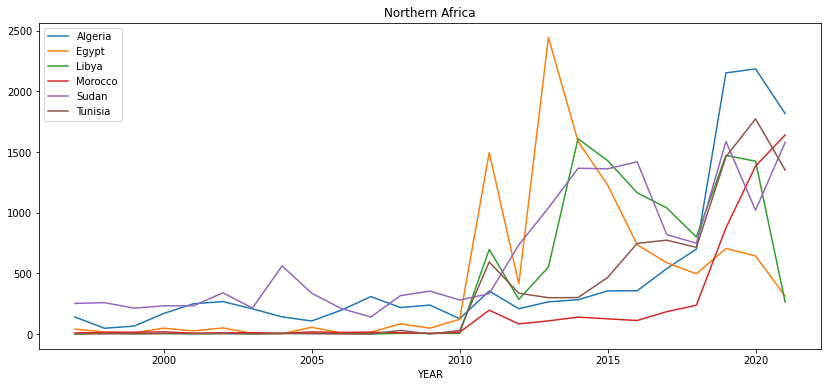

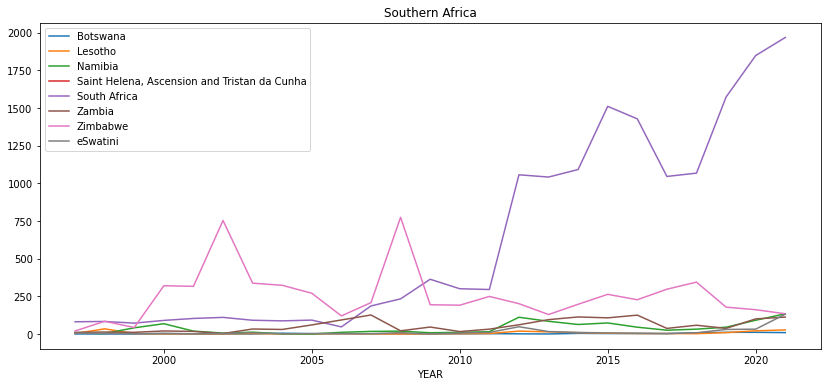

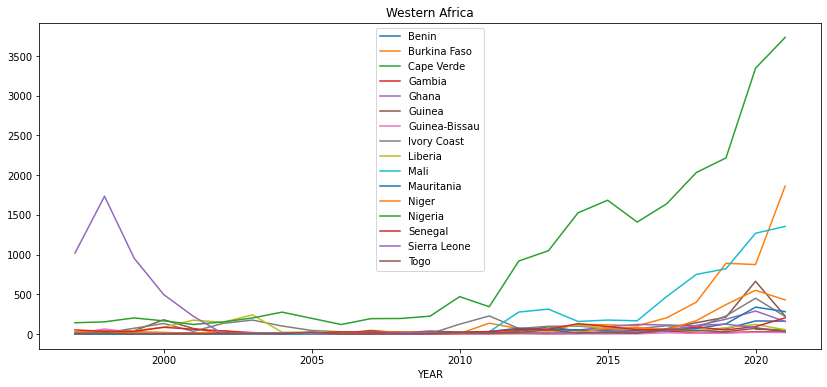

In [20]:
import matplotlib.pyplot as plt

regionPlots(grouped)

Consideriamo solamente le proteste, tralasciando tutte le altre tipologie di eventi("battaglie","atti di violenza")

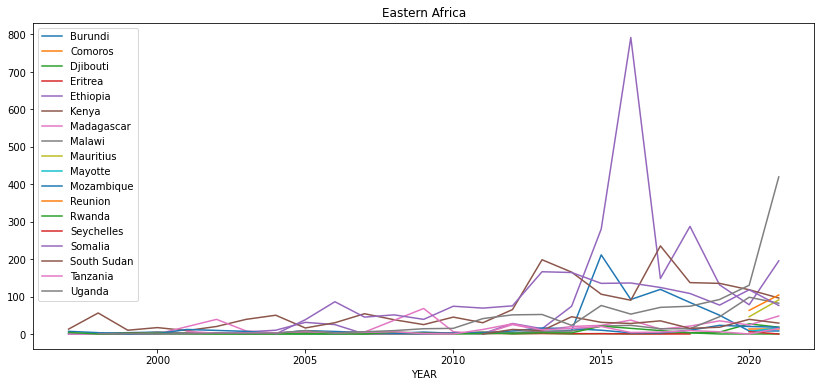

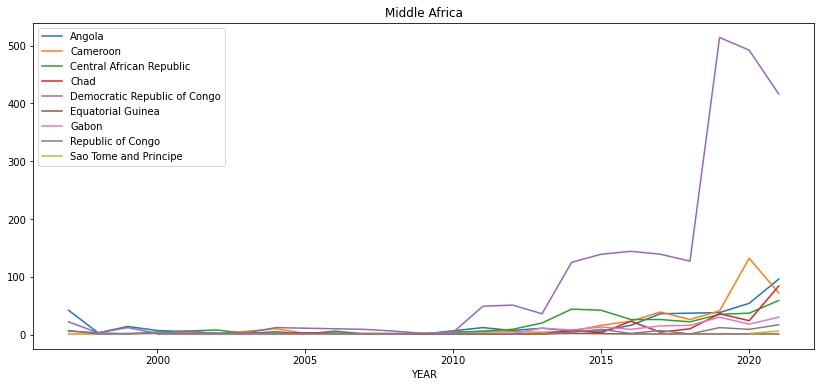

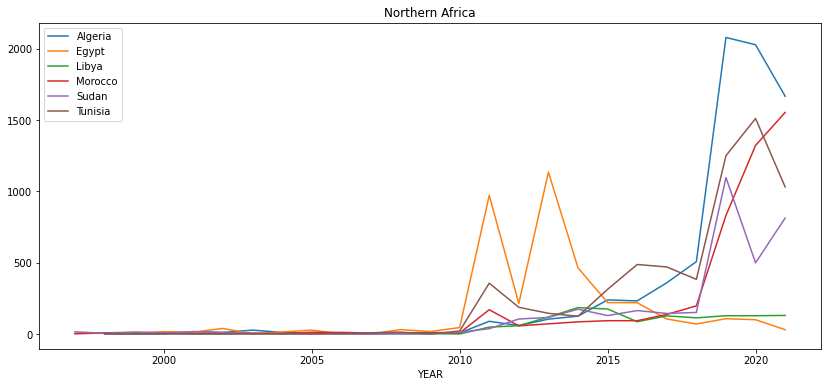

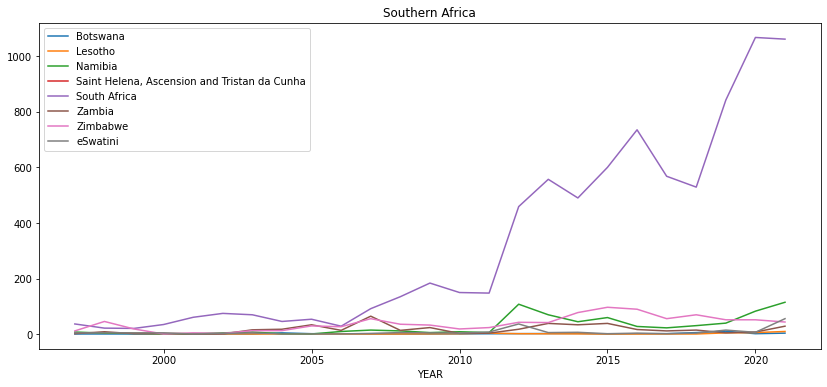

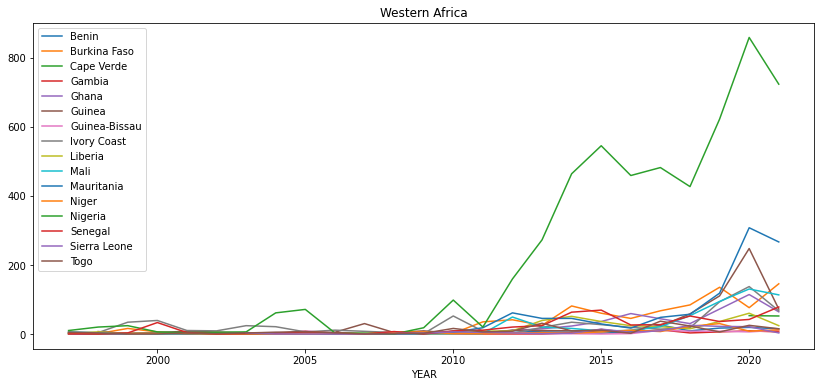

In [21]:
regionPlots(groupedProtests)

## Ristrutturiamo il dataframe: una colonna per ogni stato

In [22]:
def concatCountries(region_df, index="YEAR"):
    labels = []
    countries = []
    #per ogni Stato estraggo un serie e il relativo nome
    for label, country in region_df.groupby('COUNTRY'):
        labels.append(label)
        countries.append(country.set_index([index])['EVENTS'])
    return pd.concat(countries, axis=1, keys=labels)
    
def concatCountriesByRegion(_df, index="YEAR"):
    df_container = {}
    #suddivido il dataframe in un dataframe per regione
    for label_region, region_df in _df.groupby(['REGION']):
        df_container[label_region] = concatCountries(region_df, index)
    return df_container

#grouped o groupedProtests
protests = concatCountriesByRegion(groupedProtests)
print(protests.keys())
print(len(protests))
protests['Northern Africa'] = protests['Northern Africa'].fillna(0)
protests['Northern Africa'].head()

dict_keys(['Eastern Africa', 'Middle Africa', 'Northern Africa', 'Southern Africa', 'Western Africa'])
5


,Algeria,Egypt,Libya,Morocco,Sudan,Tunisia
YEAR,,,,,,
1997,0.0,4.0,0.0,3,16,0.0
1998,1.0,6.0,5.0,9,6,2.0
1999,0.0,5.0,0.0,13,12,1.0
2000,2.0,17.0,0.0,10,9,2.0
2001,18.0,14.0,2.0,4,16,0.0


Prediciamo il futuro, per questo non dobbiamo considerare nella correlazione i dati che andranno nel test set.
<br>Non li selezioniamo casualmente perchè vogliamo predire il futuro.<br>
Utiliziamo l'80% per il training set e il 20% per il test set.<br>
Quindi, dato che gli anni disponibili nel dataset vanno dal 1997 al 2021, estremi inclusi, prenderemo gli ultimi 5 anni per il test set.

In [23]:
#CONSIDERANDO LE PROTESTE
north_TR = protests['Northern Africa'][protests['Northern Africa'].index < 2017] 
north_TE = protests['Northern Africa'][protests['Northern Africa'].index >= 2017]  #da predire
print("TEST SET")
north_TE

TEST SET


,Algeria,Egypt,Libya,Morocco,Sudan,Tunisia
YEAR,,,,,,
2017,360.0,106.0,128.0,138,145,471.0
2018,508.0,71.0,114.0,198,152,384.0
2019,2080.0,108.0,129.0,832,1098,1251.0
2020,2029.0,101.0,129.0,1323,500,1512.0
2021,1668.0,31.0,131.0,1554,814,1032.0


In [24]:
north_TR.corr()

,Algeria,Egypt,Libya,Morocco,Sudan,Tunisia
Algeria,1.000000,0.472662,0.853776,0.756100,0.879698,0.894635
Egypt,0.472662,1.000000,0.594061,0.792376,0.535776,0.562195
Libya,0.853776,0.594061,1.000000,0.708773,0.921999,0.656930
Morocco,0.756100,0.792376,0.708773,1.000000,0.690907,0.881898
Sudan,0.879698,0.535776,0.921999,0.690907,1.000000,0.760701
Tunisia,0.894635,0.562195,0.656930,0.881898,0.760701,1.000000


In [25]:
top_north_corr = north_TR[['Algeria','Morocco','Sudan','Tunisia']].corr()
top_north_corr

,Algeria,Morocco,Sudan,Tunisia
Algeria,1.000000,0.756100,0.879698,0.894635
Morocco,0.756100,1.000000,0.690907,0.881898
Sudan,0.879698,0.690907,1.000000,0.760701
Tunisia,0.894635,0.881898,0.760701,1.000000


In [26]:
top_north_corr.sum()

Algeria    3.530432
Morocco    3.328905
Sudan      3.331305
Tunisia    3.537234
dtype: float64

Quindi il numero di proteste in Morocco, Sudan e Tunisia rappresenteranno le variabili indipendenti e l'Algeria la variabile dipendente

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

class PolynomialRidge:
    def __init__(self):
        self.pf    =  PolynomialFeatures()
        self.model =  Ridge(alpha=1)
    
    def setDegree(self,degree):
        self.pf = PolynomialFeatures(degree)
        return self
    def fit(self, trainX, trainY):
        poly_trainX = self.pf.fit_transform(trainX)
        return self.model.fit(poly_trainX, trainY)
    def predict(self,X):
        polyX = self.pf.fit_transform(X)
        return self.model.predict(polyX)
        

regTypes = {
            'linear' : LinearRegression,
            'ridge'  : Ridge,
            'polynom': PolynomialRidge  
           }

def getSets(set_TR,set_TE, independent, dependent):
    sets = {}
    sets['x_train'] = set_TR[independent] 
    sets['y_train'] = set_TR[dependent]
    sets['x_test'] = set_TE[independent]
    sets['y_test'] = set_TE[dependent]
    return sets

def getModel(reg_name,sets):
    reg = regTypes[reg_name]()
    reg.fit(sets['x_train'],sets['y_train'])
    return reg
    
def predict(model, sets):
    prediction = {}
    prediction['train'] = model.predict(sets['x_train'])
    prediction['test'] = model.predict(sets['x_test'])
    return prediction

#Mean Absolute Error
def MAE(y, y_pred):
    return (y-y_pred).abs().mean()

#Mean Absolute Percent Error
def MAPE(y, y_pred):
    return ((y-y_pred)/y).abs().mean() * 100

Prediciamo i risultati con la seguente pipeline:

In [28]:
independent = ['Morocco','Sudan','Tunisia']
dependent = 'Algeria'

model = {}
preds = {}

#suddiviamo training e test set in features e label
north = getSets(north_TR,north_TE, independent, dependent)
#otteniamo il modello lineare
model['linear'] = getModel('linear',north)
#prediciamo i valori della variabile dipendente
preds['linear'] = predict(model['linear'], north)

Calcoliamo il MAE (Mean Absolute Error):<br>
La sua formula è la seguente:
 $$  \frac{1}{n} \sum_{i=1}^n \left\lvert y_i - \hat{y_i}\right\rvert $$
 dove $ y_i $ rappresenta i valori reali, mentre $ \hat{y_i} $ rappresenta i valori predetti.

In [29]:
print("Regressione Lineare considerando Paesi \"simili\":")
print('\tCoefficienti: ',model['linear'].coef_)
print('\tIntercetta: ',model['linear'].intercept_)
print(f"\tMAE sul training set: {MAE(north['y_train'],preds['linear']['train'])}")
print(f"\tMAE sul test set: {MAE(north['y_test'],preds['linear']['test'])}") #prova a togliere Morocco

Regressione Lineare considerando Paesi "simili":
	Coefficienti:  [-0.30805303  0.60100512  0.35807797]
	Intercetta:  4.176946129491952
	MAE sul training set: 12.798402186094544
	MAE sul test set: 915.4008665096013


In [30]:
model['ridge'] = getModel('ridge',north)
preds['ridge'] = predict(model['ridge'], north)

print("Regressione Lineare con regularization considerando Paesi \"simili\":")
print(f"\tMAE sul training set: {MAE(north['y_train'],preds['ridge']['train'])}")
print(f"\tMAE sul test set: {MAE(north['y_test'],preds['ridge']['test'])}")

Regressione Lineare con regularization considerando Paesi "simili":
	MAE sul training set: 12.798431436251404
	MAE sul test set: 915.3805674535546


In [31]:
model['polynom'] = getModel('polynom',north)
preds['polynom'] = predict(model['polynom'], north)
print("Regressione Polinomiale con regularization considerando Paesi \"simili\":")
print("MAE on the training set: {:0.4f}".format(MAE(north['y_train'],preds['polynom']["train"])))
print("MAE on the test set: {:0.4f}".format(MAE(north['y_test'],preds['polynom']["test"])))

Regressione Polinomiale con regularization considerando Paesi "simili":
MAE on the training set: 3.7864
MAE on the test set: 14579.5878


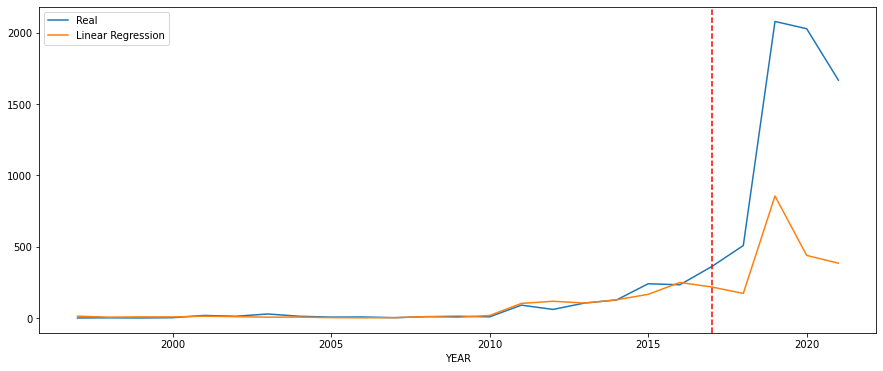

In [32]:
import numpy as np

protests_predictions = pd.DataFrame(
    {
        'Real': protests['Northern Africa'][dependent], 
        'Linear Regression': np.concatenate((preds['linear']['train'],preds['linear']['test'])),
    }
)
fig, ax = plt.subplots(figsize=(15,6))

protests_predictions.plot(ax=ax)

plt.axvline(x = 2017, color = 'r',linestyle="--", label = 'train - test')

In [33]:
print(f"Errore medio di base: {MAE(north['y_test'],north['y_train'].mean())}")

Errore medio di base: 1280.45


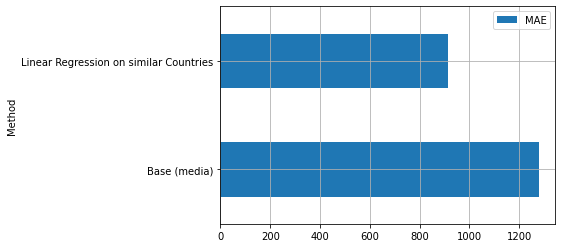

In [34]:
scores = pd.DataFrame(
    {
        'Method': ['Base (media)', 'Linear Regression on similar Countries'], 
        'MAE': [MAE(north['y_test'],north['y_train'].mean()),  MAE(north['y_test'],preds['linear']['test'])]}
)
scores = scores.set_index('Method')
scores.plot.barh()
plt.grid()
plt.show()

## Raggruppiamo per trimestri (quarters in a year)

In [35]:
df['TRIMESTRE'] = pd.PeriodIndex(pd.to_datetime(df.EVENT_DATE), freq='Q')
north_df = df[df["REGION"] == "Northern Africa"]
northQuarters = getEventCol(north_df[north_df['EVENT_TYPE']=="Protests"].groupby(["REGION",'COUNTRY','TRIMESTRE']))
northQuarters = concatCountries(northQuarters, index="TRIMESTRE").fillna(0)

# Conto, per colonna, quanti Stati hanno trimestri con 0 proteste 
(northQuarters == 0).astype(int).sum(axis=0)

Algeria    25
Egypt      19
Libya      41
Morocco    12
Sudan      17
Tunisia    40
dtype: int64

<AxesSubplot:title={'center':'Andamento trimestrale del numero di proteste'}, xlabel='TRIMESTRE'>

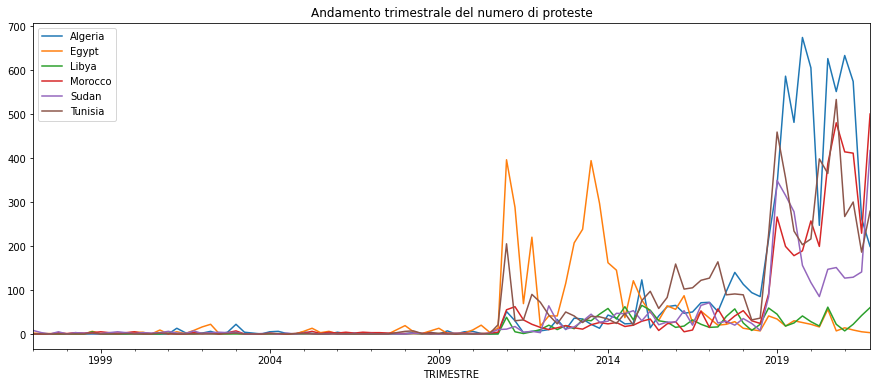

In [36]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title("Andamento trimestrale del numero di proteste")
northQuarters.plot(ax=ax)

Rappresentando i dati in questo modo possiamo anche fare delle semplici analisi, come la media di proteste per trimestre tra tutti gli Stati del Nord Africa.

In [37]:
northQuarters.groupby(northQuarters.index.quarter).mean().mean(axis=1)

TRIMESTRE
1    49.080000
2    43.493333
3    38.540000
4    53.645833
dtype: float64

Da cui si può notare che, in media, il terzo trimestre (Luglio, Agosto e Settembre) è il periodo con meno proteste.

Dividiamo anche questa volta i dati in training e test set, assegnando rispettivamente 80% e 20% delle osservazioni complessive. 

In [38]:
northQ_TR = northQuarters[northQuarters.index.year < 2017] 
northQ_TE = northQuarters[northQuarters.index.year >= 2017]

In [39]:
#suddiviamo training e test set in features e label
northQ = getSets(northQ_TR,northQ_TE, independent, dependent)
#alleniamo il modello lineare sulle osservazioni enumerate per trimeste
model['linearQ'] = getModel('linear',northQ)
#prediciamo i valori della variabile dipendente
preds['linearQ'] = predict(model['linearQ'], northQ)

In [40]:
print("Regressione Lineare considerando Paesi \"simili\":")
print('\tCoefficienti: ',model['linearQ'].coef_)
print('\tIntercetta: ',model['linearQ'].intercept_)
print(f"\tMAE sul training set: {MAE(northQ['y_train'],preds['linearQ']['train'])}")
print(f"\tMAE sul test set: {MAE(northQ['y_test'],preds['linearQ']['test'])}")

Regressione Lineare considerando Paesi "simili":
	Coefficienti:  [0.22179021 0.36246575 0.24950969]
	Intercetta:  1.2895247753615067
	MAE sul training set: 7.130718557705375
	MAE sul test set: 193.68230214521105


In [41]:
print(f"Errore medio di base: {MAE(northQ['y_test'],northQ['y_train'].mean())}")

Errore medio di base: 319.9588607594936


Tramite il <b>Mean Absolute Error</b> possiamo misurare di quanto si discostano i valori predetti dai valori reali.<br>
Ma, per confrontante la predizione effettuata tramite gli anni rispetto alla predizione a partire dai trimestri, il MAE non è adatto in quanto le distanze verrebbero calcolate su dati di grandezza differente.<br>
<div style="border-left:6px solid ##2196F3;margin:10px 0;padding:10px;background-color:#ddffff"> Ad esempio, un MAE pari a 500 relativo a una distribuzione di valori la cui media è 10^6 indica una buona predizione, ma non si potrebbe affermare lo stesso per una distribuzione la cui media è dell'ordine delle decine.</div>
Dato che la media degli eventi per anno è quattro volte la media dei dati per trimestre, optiamo per un'altra metrica: il <b>Mean Absolute Percent Error</b> (MAPE).<br>
Tale metrica misura di quanto, in media, le predizioni si discostano dai valori reali, <i>relativamente</i> alla loro grandezza.<br> La sua formula è la seguente: <br>
 $$  \frac{1}{n} \sum_{i=1}^n \left\lvert \frac{y_i - \hat{y_i}}{y_i}\right\rvert  100$$

In [42]:
print("Mean Absolute Percent Error")
print(f"\t Mean with years: {MAPE(north['y_test'],north['y_train'].mean())}%")
print(f"\t Mean with quarters: {MAPE(northQ['y_test'],northQ['y_train'].mean())}%")
print(f"\t Linear Regression with years: {MAPE(north['y_test'],preds['linear']['test'])}%")
print(f"\t Linear Regression with quarters: {MAPE(northQ['y_test'],preds['linearQ']['test'])}%")

Mean Absolute Percent Error
	 Mean with years: 93.86383837187789%
	 Mean with quarters: 92.85099790487195%
	 Linear Regression with years: 63.98756920424458%
	 Linear Regression with quarters: 54.34198757836486%


Come possiamo vedere, il modello di regressione lineare applicato ai dati trimestrali è stato, finora, quello con la migliore predizione.<br>
Indichiamo con:
    <ul>
        <li><b>LR</b>: Linear Regression</li>
        <li><b>SM</b>: Similar Countries</li>
    </ul>

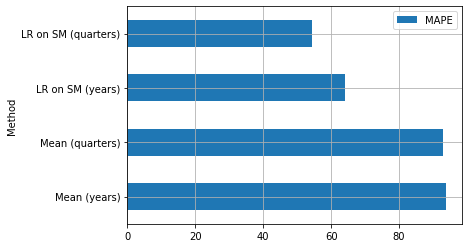

In [79]:
scoresMAPE = pd.DataFrame(
    {
        'Method': ['Mean (years)','Mean (quarters)', 'LR on SM (years)','LR on SM (quarters)'], 
        'MAPE': [MAPE(north['y_test'],north['y_train'].mean()),
                MAPE(northQ['y_test'],northQ['y_train'].mean()),
                MAPE(north['y_test'],preds['linear']['test']),
                MAPE(northQ['y_test'],preds['linearQ']['test'])]}
)
scoresMAPE = scoresMAPE.set_index('Method')
scoresMAPE.plot.barh()
plt.grid()
plt.show()

Il seguente grafico mostra l'andamento predetto dal modello di regressione lineare considerando i trimestri.

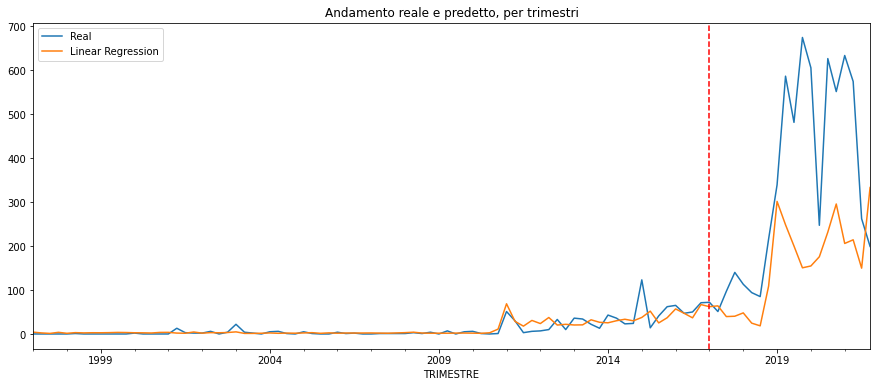

In [43]:
protests_predQ = pd.DataFrame(
    {
        'Real': northQuarters[dependent], 
        'Linear Regression': np.concatenate((preds['linearQ']['train'],preds['linearQ']['test'])),
    }
)
fig, ax = plt.subplots(figsize=(15,6))
plt.title("Andamento reale e predetto, per trimestri")
protests_predQ.plot(ax=ax)

plt.axvline(x = "2017Q1", color = 'r',linestyle="--", label = 'train - test')

Per confrontare graficamente i valori reali e le predizioni dei due modelli finora considerati, esprimendoli anualmente, convertiamo le predizioni effettuate con l'ultimo modello da trimestri ad anni.

Passo da quarters a anni sommando, per ogni anno, le predizioni dei quattro trimestri:

In [63]:
pred_linQ = pd.Series(np.concatenate((preds['linearQ']['train'],preds['linearQ']['test'])),index=northQuarters.index)
linQ2Y = pred_linQ.groupby(northQuarters.index.year).sum()

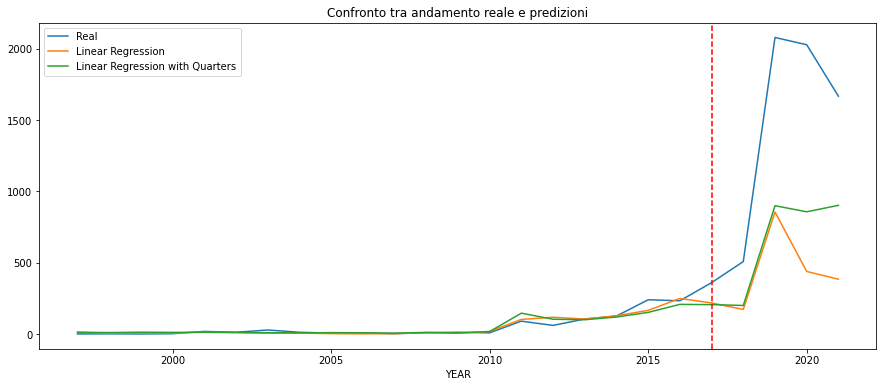

In [67]:
new_prediction = pd.Series(linQ2Y,name='Linear Regression with Quarters')
fig, ax = plt.subplots(figsize=(15,6))
plt.title("Confronto tra andamento reale e predizioni")
protests_predictions['Linear Regression with Quarters'] = linQ2Y
protests_predictions.plot(ax=ax)
plt.axvline(x = 2017, color = 'r',linestyle="--", label = 'train - test')

Ora che le predizioni dell'ultimo modello sono state convertite in $numero$ $di$ $eventi$ $/$ $anno$, possiamo calcolare il Mean Absolute Error per confrontarlo con la misura dell'altro modello.

In [74]:
print(f"\t Linear Regression with quarters(converted): {MAE(north['y_test'],linQ2Y[linQ2Y.index>=2017])}")

	 Linear Regression with quarters(converted): 715.9856686637947


Che è minore rispetto al MAE del modello calcolato a partire dagli anni (915.40).<br>
Tale risultato conferma ciò che avevamo osservato tramite il MAPE: il modello di regressione lineare calcolato sui trimestri ha predetto il numero di eventi in maniera più accurata (anche se leggermente).

## Moving Average

Rolling mean/Moving Average (MA) smooths out price data by creating a constantly updated average price. This is useful to cut down “noise” in our price chart. Furthermore, this Moving Average could act as “Resistance” meaning from the downtrend and uptrend of stocks you could expect it will follow the trend and less likely to deviate outside its resistance point.

## Western Africa

Nelle altre regioni africane, le proteste registrate nel dataset sono poche, per questo motivo ho preferito tenere in considerazione tutti gli eventi.

In [46]:
events = concatCountriesByRegion(grouped)

In [47]:
events['Western Africa'] = events['Western Africa'].drop('Cape Verde',axis=1)
# events['Western Africa'].corr()

In [48]:
west_TR = events['Western Africa'][events['Western Africa'].index < 2017] 
west_TE = events['Western Africa'][events['Western Africa'].index >= 2017]  #da predire
print("TEST SET")
west_TE

TEST SET


,Benin,Burkina Faso,Gambia,Ghana,Guinea,Guinea-Bissau,Ivory Coast,Liberia,Mali,Mauritania,Niger,Nigeria,Senegal,Sierra Leone,Togo
YEAR,,,,,,,,,,,,,,,
2017,39,205,40,114,68,16,105,56,473,56,56,1641,53,36,59
2018,40,402,11,104,143,9,74,42,751,68,169,2034,88,109,45
2019,67,891,18,187,213,12,228,80,822,128,371,2217,52,125,29
2020,165,875,29,290,664,22,451,121,1269,339,551,3347,94,81,72
2021,162,1863,27,158,227,19,222,54,1355,282,430,3734,203,28,35


In [50]:
westCorrellation = west_TR.corr()
westCorrellation.head()

,Benin,Burkina Faso,Gambia,Ghana,Guinea,Guinea-Bissau,Ivory Coast,Liberia,Mali,Mauritania,Niger,Nigeria,Senegal,Sierra Leone,Togo
Benin,1.000000,0.634196,0.197970,0.795344,0.077883,-0.115338,0.174282,-0.121643,0.777902,0.713818,0.424128,0.759830,0.330325,-0.261128,0.517547
Burkina Faso,0.634196,1.000000,0.370222,0.674199,0.066145,-0.169687,0.404490,0.005170,0.569646,0.670109,0.385482,0.780199,0.609581,-0.237691,0.270628
Gambia,0.197970,0.370222,1.000000,0.571057,0.195053,-0.365381,0.209631,0.632464,0.193693,0.116530,0.496813,0.475410,0.470504,-0.294154,-0.111575
Ghana,0.795344,0.674199,0.571057,1.000000,0.182723,-0.223890,0.033691,0.081266,0.732141,0.582518,0.743382,0.903972,0.521349,-0.285464,0.356818
Guinea,0.077883,0.066145,0.195053,0.182723,1.000000,-0.030003,0.066716,0.154976,0.229783,0.094387,0.022564,0.155652,0.509565,0.089817,0.165314


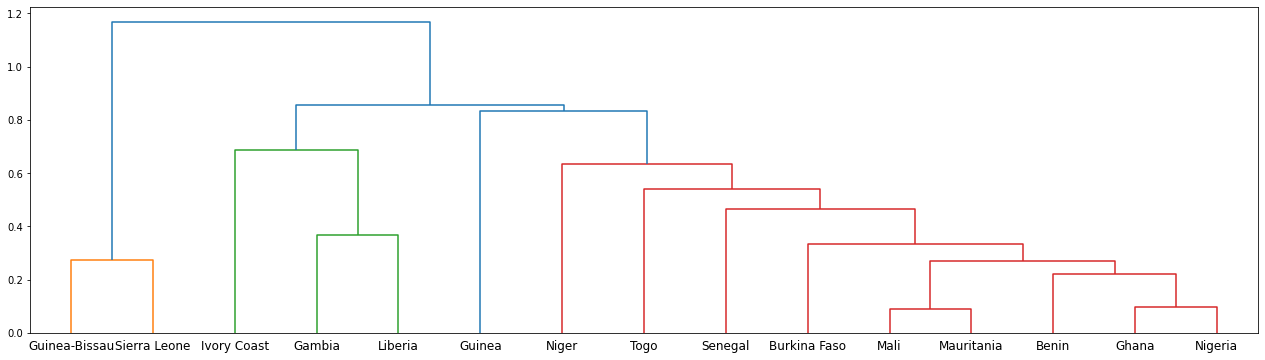

In [51]:
import numpy as np
from scipy.cluster import hierarchy as hc
from matplotlib.figure import Figure
corr = 1 - westCorrellation #perchè la diagonale della matrice delle coordinate passate deve essere zero

plt.subplots(figsize=(22,6))
corr_condensed = hc.distance.squareform(corr)
z = hc.linkage(corr_condensed, method='average')
dendrogram = hc.dendrogram(z, labels=corr.columns)

plt.show()

In [52]:
# top_west_corr = events['Western Africa'][['Burkina Faso','Ghana','Mali','Nigeria','Niger','Benin','Mauritania']].corr()
top_west_corr = events['Western Africa'][['Mali','Mauritania','Benin','Ghana','Nigeria']].corr()
top_west_corr

,Mali,Mauritania,Benin,Ghana,Nigeria
Mali,1.000000,0.943322,0.954925,0.900818,0.952237
Mauritania,0.943322,1.000000,0.978623,0.878052,0.901535
Benin,0.954925,0.978623,1.000000,0.868081,0.897855
Ghana,0.900818,0.878052,0.868081,1.000000,0.920816
Nigeria,0.952237,0.901535,0.897855,0.920816,1.000000


In [53]:
top_west_corr.sum()

Mali          4.751302
Mauritania    4.701532
Benin         4.699484
Ghana         4.567766
Nigeria       4.672443
dtype: float64

In [54]:
# events['Western Africa'][['Burkina Faso','Ghana','Mali','Nigeria','Niger','Benin','Mauritania']].head(25)
events['Western Africa'][['Mali','Mauritania','Benin','Ghana','Nigeria']].head(25)

,Mali,Mauritania,Benin,Ghana,Nigeria
YEAR,,,,,
1997,14,5,2,5,142
1998,3,1,3,4,154
1999,10,3,2,2,203
2000,4,4,1,10,166
2001,5,1,3,8,121
2002,2,3,1,7,152
2003,3,13,2,17,203
2004,3,2,2,7,276
2005,2,9,2,3,198


In [55]:
w_independent = ['Mauritania','Benin','Ghana','Nigeria']
w_dependent = 'Mali'

w_model = {}
w_preds = {}

#suddiviamo training e test set in features e label
west = getSets(west_TR,west_TE, w_independent, w_dependent)
#otteniamo il modello lineare
w_model['linear'] = getModel('linear',west)
#prediciamo i valori della variabile dipendente
w_preds['linear'] = predict(w_model['linear'], west)

In [56]:
print(f"MAE di base (considerando la media): {MAE(west['y_test'],west['y_train'].mean())}")

MAE di base (considerando la media): 872.1


In [57]:
print("Regressione Lineare considerando Paesi \"simili\":")
print('\tCoefficienti: ',w_model['linear'].coef_)
print('\tIntercetta: ',w_model['linear'].intercept_)
print(f"\tMAE sul training set: {MAE(west['y_train'],w_preds['linear']['train'])}")
print(f"\tMAE sul test set: {MAE(west['y_test'],w_preds['linear']['test'])}")

Regressione Lineare considerando Paesi "simili":
	Coefficienti:  [ 3.64647548  0.22281725  1.31612964 -0.0364127 ]
	Intercetta:  -20.194673203340948
	MAE sul training set: 22.46780797515972
	MAE sul test set: 263.7980752555256


In [58]:
w_model['ridge'] = getModel('ridge',west)

w_preds['ridge'] = predict(w_model['ridge'], west)

print("Regressione Lineare con regularizetion considerando Paesi \"simili\":")
print(f"\tMAE sul training set: {MAE(west['y_train'],w_preds['ridge']['train'])}")
print(f"\tMAE sul test set: {MAE(west['y_test'],w_preds['ridge']['test'])}")

Regressione Lineare con regularizetion considerando Paesi "simili":
	MAE sul training set: 22.463863866859477
	MAE sul test set: 263.7090129601693


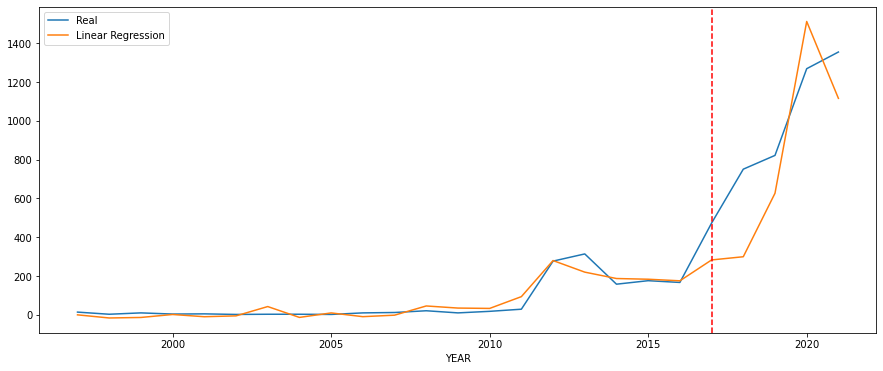

In [59]:
west_predictions = pd.DataFrame(
    {
        'Real': events['Western Africa'][w_dependent], 
        'Linear Regression': np.concatenate((w_preds['linear']['train'],w_preds['linear']['test'])),
    }
)
fig, ax = plt.subplots(figsize=(15,6))

west_predictions.plot(ax=ax)

plt.axvline(x = 2017, color = 'r',linestyle="--", label = 'train - test')

## Raggruppiamo per mesi

In [60]:
# new_df = df[df['EVENT_DATE ']<2022]
per_mese = df.EVENT_DATE.dt.to_period("M").rename("MESE")
months = getEventCol(df[df['EVENT_TYPE']=="Protests"].groupby(["REGION",'COUNTRY',per_mese]))
monthsProtests = getEventCol(df[df['EVENT_TYPE']=="Protests"].groupby(["REGION",'COUNTRY',per_mese]))

regionPlots(monthsProtests,x="MESE")

AttributeError: Can only use .dt accessor with datetimelike values

## Raggruppiamo per trimestri (quarters in a year)

In [ ]:
regionPlots(quartersProtests,x="TRIMESTRE")